In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [67]:
up_bound = 10000
low_bound = 0
step_size = 1

In [68]:
num_tosses_arr = np.arange(low_bound,up_bound,step_size)
num_heads_list = []

In [69]:
for num_tosses in num_tosses_arr:
    num_heads = 0
    for i in range(num_tosses):
        toss = np.random.randint(0,2)
        if toss == 1:
            num_heads+=1
    num_heads_list.append(num_heads)

In [117]:
num_heads_arr = np.array(num_heads_list)
chance_error_arr = num_tosses_arr/2 - num_heads_arr
chance_error_percent_arr = np.round((num_heads_arr/num_tosses_arr)*100 - 50,3)

<ipython-input-117-bea1f60f3108>:3: RuntimeWarning: invalid value encountered in true_divide
  chance_error_percent_arr = np.round((num_heads_arr/num_tosses_arr)*100 - 50,3)


In [134]:
skip = 200
num_heads = num_heads_arr[0::skip]
chance_error = chance_error_arr[0::skip]
num_tosses = num_tosses_arr[0::skip]
chance_error_percent = chance_error_percent_arr[0::skip]

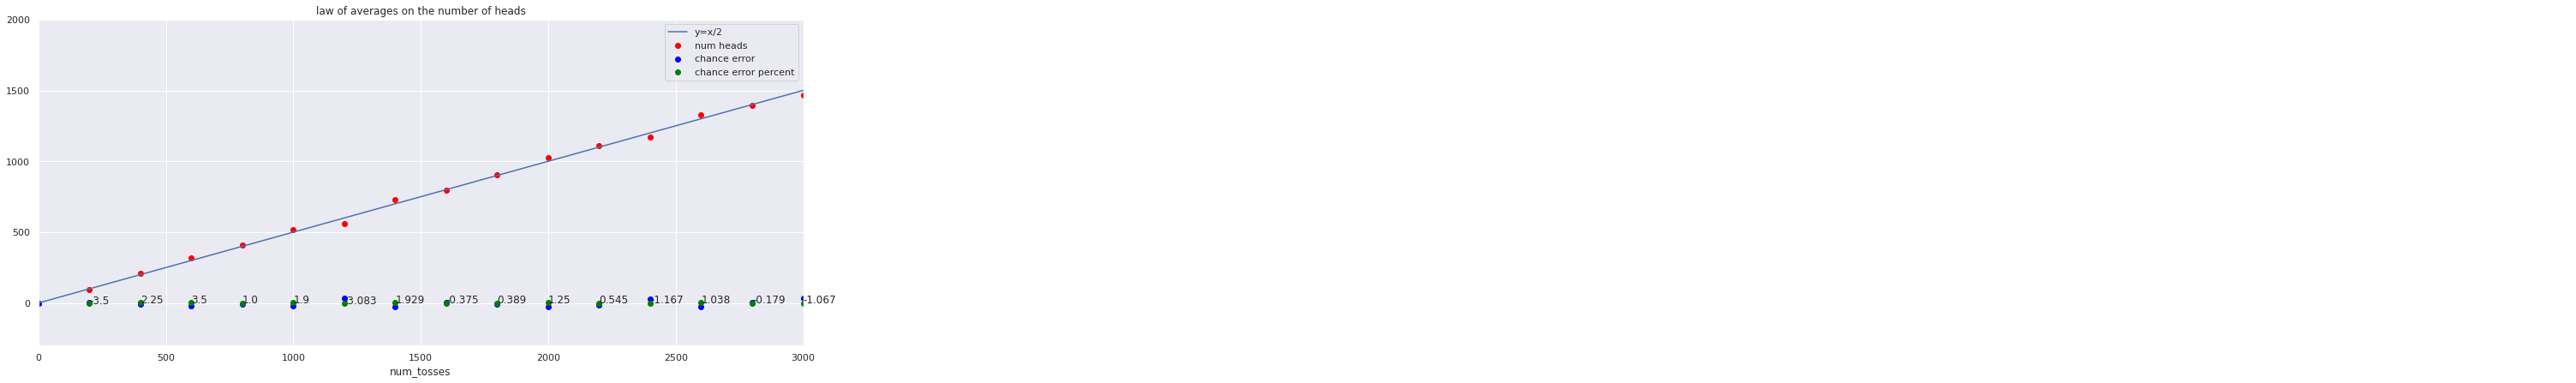

In [135]:
fig,ax = plt.subplots(figsize=(16,7))
ax.scatter(num_tosses, num_heads,label="num heads",color='red')
ax.scatter(num_tosses,chance_error,label="chance error",color="blue")
ax.scatter(num_tosses,chance_error_percent,label="chance error percent",color="green")

ax.plot(num_tosses, num_tosses/2,label="y=x/2")
ax.set(xlim=(low_bound,3000),ylim=(-300,2000),title="law of averages on the number of heads")
ax.set(xlabel="num_tosses",)
for i, txt in enumerate(chance_error_percent):
    ax.annotate(txt, (num_tosses[i], chance_error_percent[i]))

    
ax.legend()

We see from the above plot that chance error keeps increasing in absolute magnitude as the no of tosses increases. Whereas, percent chance error keeps decreasing. Play around with skip and y_upper bound to see the magic

# law of large nos.

In [145]:
# First create a large sample
arr = np.random.randn(1000000)
mu = np.mean(arr)
mu

-0.0003576947784188957

In [155]:
temp_arr_size = np.arange(1000,1000000,1000)
mean_temp_arr_list = []
for size in temp_arr_size:
    arr_temp = np.random.choice(arr,size=size,replace=False)
    mean = np.mean(arr_temp)
    mean_temp_arr_list.append(mean)

In [156]:
mean_temp_arr = np.array(mean_temp_arr_list)

In [166]:
skip = 10
mean_arr = mean_temp_arr[0::skip]
arr_size = temp_arr_size[0::skip]

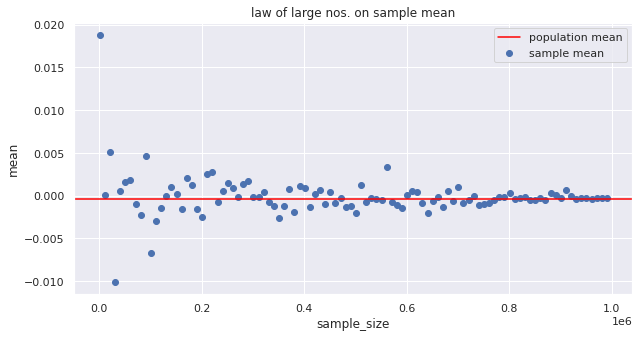

In [174]:
fig,ax = plt.subplots(figsize=(10,5))
ax.scatter(arr_size,mean_arr,label="sample mean")
plt.axhline(y=mu,color='red',label="population mean")
ax.set(xlabel="sample_size",ylabel="mean",title="law of large nos. on sample mean")
ax.legend()